In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split

from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense , Flatten , Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam , RMSprop

# Loading data

In [3]:
train = pd.read_csv(r"C:\Users\PIYUSH\digit-recognizer\train.csv")
test = pd.read_csv(r"C:\Users\PIYUSH\digit-recognizer\test.csv")

In [4]:
Y_train = train['label']
X_train = train.drop(["label"], axis = 1)
del train

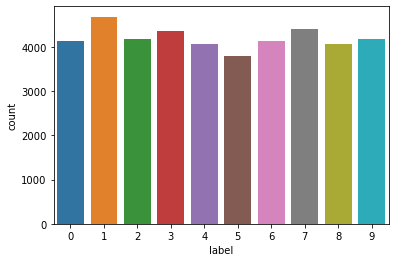

In [5]:
sns.countplot(Y_train)

# Normalisation

In [6]:
X_train = X_train/255.0
test = test/255.0

# Reshape

In [7]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [8]:
Y_train = to_categorical(Y_train,num_classes = 10)

In [9]:
random_seed = 2

In [10]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state = random_seed)
X_train.shape

(37800, 28, 28, 1)

## Creating Neural Net

In [11]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (5,5), input_shape =(28,28,1), activation = 'relu'))
model.add(Conv2D(32, kernel_size = (5,5), activation = 'relu'))
model.add(MaxPooling2D(pool_size= (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size = (3,3),activation = 'relu'))
model.add(Conv2D(64,kernel_size = (3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size= (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dense(256,activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

# Data Augmentation

In [12]:
datagen = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range = 0.1,
                             rotation_range=10)
datagen.fit(X_train)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0

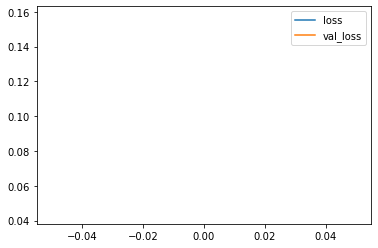

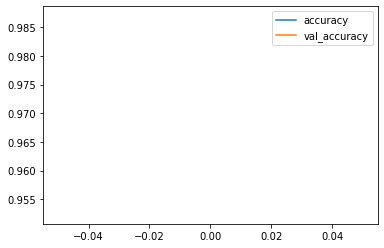

In [16]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer= optimizer, loss ="categorical_crossentropy",metrics = ["accuracy"])
print(model.summary())
batch_size = 86
epochs = 1

h = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 1, steps_per_epoch=X_train.shape[0]//batch_size)

plt.plot(h.history['loss'], label = 'loss')
plt.plot(h.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

plt.plot(h.history['accuracy'], label = 'accuracy')
plt.plot(h.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()

In [17]:
results = model.predict(test)

results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [20]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("submission.csv",index=False)

In [19]:
kaggle competitions submit -c digit-recognizer -f submission.csv -m "Message"

SyntaxError: invalid syntax (<ipython-input-19-5102b3eac1ce>, line 1)